In [4]:
import sys
# !{sys.executable} -m pip install pennylane==0.31.0
import pennylane as qml
import numpy as np
from quantum.circuits.Ansatz import rotation_layer
from quantum.circuits.Old_Ansatz import efficient_su2, two_local, modified_pauli_two, hadamard_ansatz, excitation_preserving

In [5]:
from qiskit.circuit import library

In [6]:

help(library)

Help on package qiskit.circuit.library in qiskit.circuit:

NAME
    qiskit.circuit.library

DESCRIPTION
    Circuit Library (:mod:`qiskit.circuit.library`)
    
    .. currentmodule:: qiskit.circuit.library
    
    The circuit library is a collection of well-studied and valuable circuits, directives, and gates.
    We call them valuable for different reasons, for instance they can serve as building blocks for
    algorithms or they are circuits that we think are hard to simulate classically.
    
    Each element can be plugged into a circuit using the :meth:`.QuantumCircuit.append`
    method and so the circuit library allows users to program at higher levels of abstraction.
    For example, to append a multi-controlled CNOT:
    
    .. plot::
       :include-source:
    
       from qiskit.circuit.library import MCXGate
       gate = MCXGate(4)
    
       from qiskit import QuantumCircuit
       circuit = QuantumCircuit(5)
       circuit.append(gate, [0, 1, 4, 2, 3])
       circui

In [7]:
wires = [0,1,2,3]
dev = qml.device('default.qubit', wires=wires)

(<Figure size 500x500 with 1 Axes>, <Axes: >)

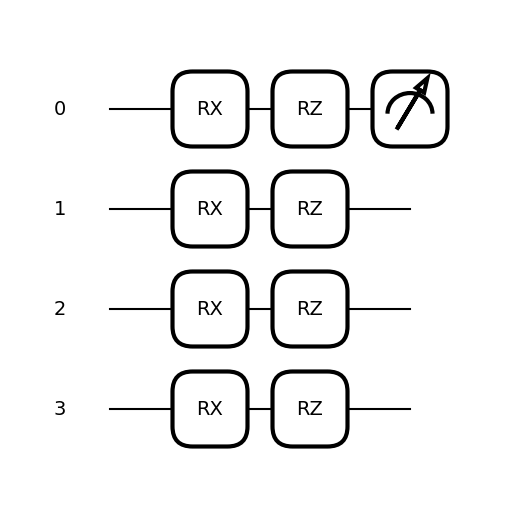

In [8]:
@qml.qnode(dev)
def circuit(params):
    rotation_layer(params, wires, False)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(8).tolist())

In [10]:
@qml.qnode(dev)
def circuit(params):
    efficient_su2(params, wires, skip_final_rot=True)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(8).tolist())

ValueError: Converter does not exist. Make sure the required plugin is installed and supports conversion.

In [11]:
@qml.qnode(dev)
def circuit(params):
    two_local(params, wires, rot_gates=['rx', 'rz'], entangle_gates='crz', skip_final_rot=True)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(11).tolist())

ValueError: Converter does not exist. Make sure the required plugin is installed and supports conversion.

In [12]:
entanglement= [(0,1), (0,2), (0,3), (1,0), (1,2), (1,3), (2,0), (2,1), (2,3), (3,0), (3,1), (3,2)]
@qml.qnode(dev)
def circuit(params):
    two_local(params, wires, rot_gates=['rx', 'rz'], entangle_gates='crz', entanglement=entanglement, skip_final_rot=False)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(28))

ValueError: Converter does not exist. Make sure the required plugin is installed and supports conversion.

(<Figure size 900x500 with 1 Axes>, <Axes: >)

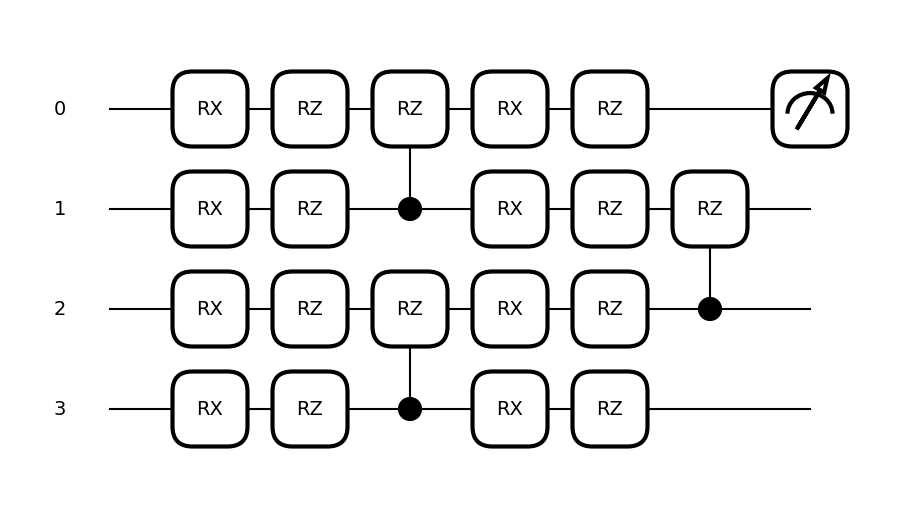

In [13]:
@qml.qnode(dev)
def circuit(params):
    modified_pauli_two(params, wires, rotation_block=['rx', 'rz'])
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(19))

(<Figure size 900x500 with 1 Axes>, <Axes: >)

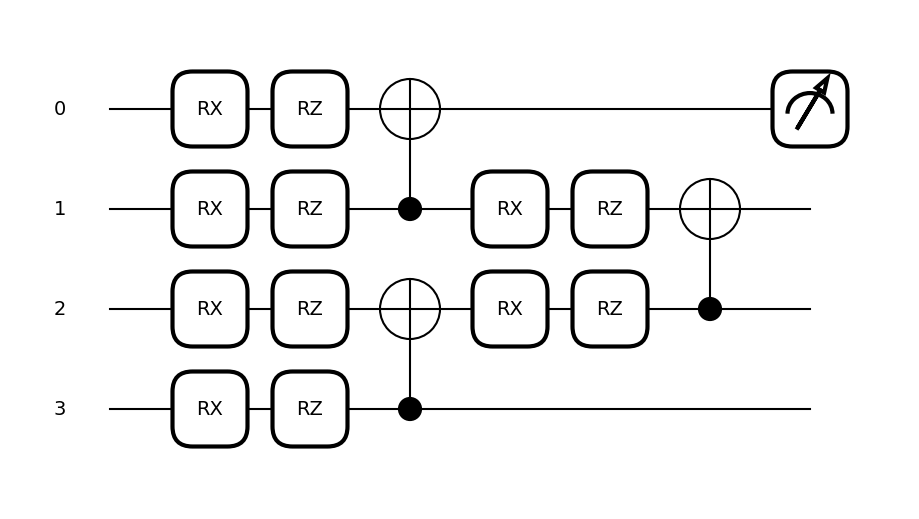

In [14]:
@qml.qnode(dev)
def circuit(params):
    modified_pauli_two(params, wires, entanglement='cnot', full_rotation=False)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(12))

(<Figure size 800x500 with 1 Axes>, <Axes: >)

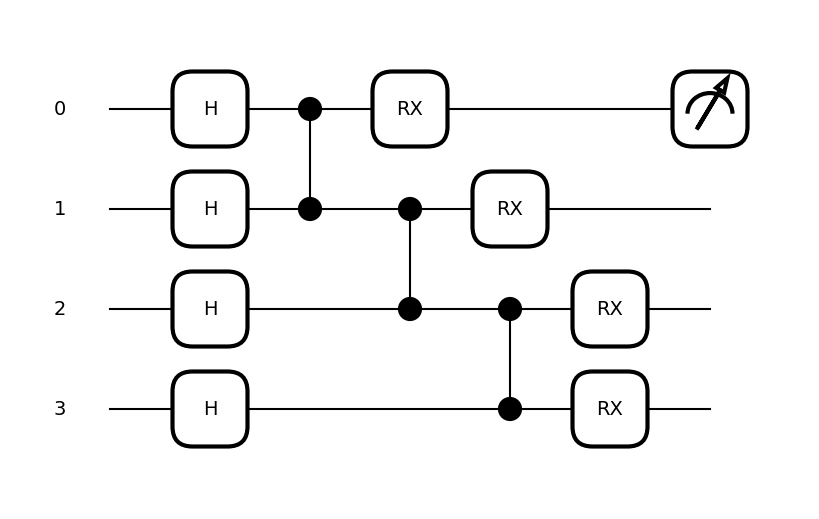

In [15]:
@qml.qnode(dev)
def circuit(params):
    hadamard_ansatz(params, wires)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(4))

In [16]:
@qml.qnode(dev)
def circuit(params):
    excitation_preserving(params, wires)
    return qml.expval(qml.PauliZ(0))
draw = qml.draw_mpl(circuit)
draw(np.random.rand(11))

ValueError: Converter does not exist. Make sure the required plugin is installed and supports conversion.